# **Projeto Estimador de gordura corporal**

###  <font color = '#0CC9C9' > *Criação de um modelo que estima a gordura corporal*
   *by [Guilherme Lima](https://www.linkedin.com/in/gui-lima-oficial/)*

## Contexto:

A gordura corporal e a gordura armazenada no corpo, ela é necessaria para que o corpo consiga realizar as funcões básicas do dia a dia,ou seja, ela não é necessariamente uma coisa ruim, ela é necessária, mas...Por que a gordura corporal tem uma fama ruim?

A má fama da gordura corporal, vem do excesso dela que pode prejudicar a saúde do individuo, pois muita gordura corporal acumulada em certos pontos do corpo, podem aumentar a chance de ataques cardiacos e as demais doenças cardiovasculares.

Claro que como comentado acima ela é sim necessaria, pois existem gorduras boas, como por exemplo a gordura marrom que tem o papel de fazer o isolamento térmico do nosso corpo queimando calorias para isso, ou seja, e uma gordura necessária.

Também existe gorduras ruins, uma delas e a gordura branca que e aquela que se acumula na barriga e/ou no quadril (esses são os dois pontos mais comuns desse tipo de gordura) e faz voce se sentir com mais fome e assim fazendo voce engorda mais, e a que mais demora para sair também, esse tipo de gordura em excesso pode sim prejudicar sua saúde, porém o real problema mesmo e o excesso dela.

Todos nos temos um certo nivel de gordura corporal, isso e normal e vital para nossa sobrevivencia, o ponto mesmo a se preocupar e o excesso dessa gordura, o excesso que pode prejudicar nossa saúde e é para isso que vou desenvolver esse projeto.

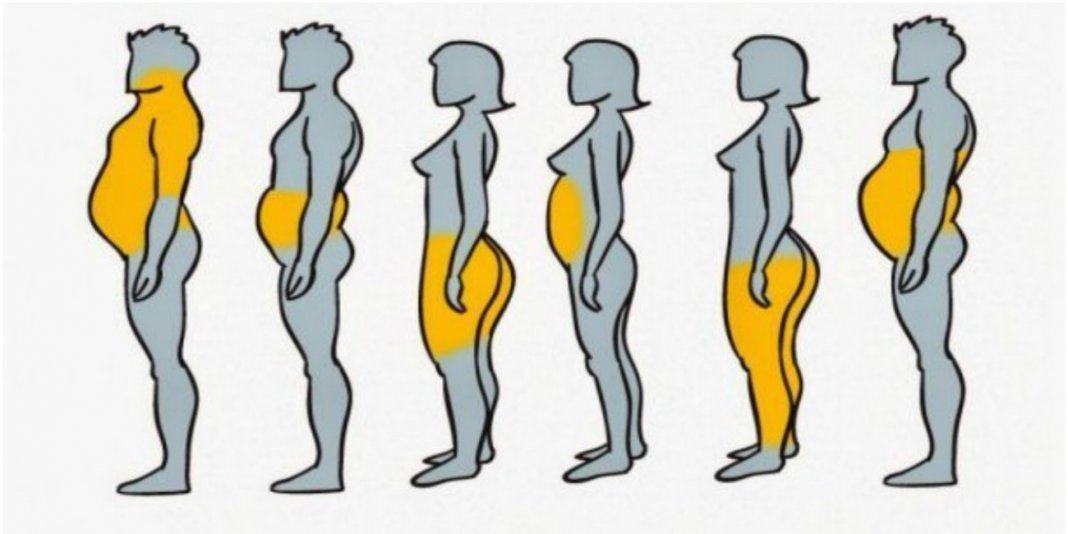

## Objetivo do projeto:

O objetivo desse projeto vai ser criar um modelo que consiga dar uma ideia para a pessoa de como está a gordura corporal dela, a ideia do projeto não é criar algo determinante, dizendo que é isso e ponto, NÂO! o ponto e dar uma ideia, pois com casos delicados assim, precisamos consultar um nutricionista profissional para que ele possa determinar com precisão sua gordura corporal, claro que com um bom modelo podemos ter uma ideia até que precisa, porém nada determinante.

## Fonte de dados:

Minha fonte de dados e um arquivo CSV que conta com informações gerais da pessoa como por exemplo: peso, altura, densidade, entre outras informação.

No arquivo temos muitas caracteristicas e a que vamos utilizar vão ser descritas com suas respectativas traduções e conceitos.

## Expectativas do projeto:

Espero conseguir criar um projeto que com poucas informações, consiga determinar com um certo grau de precisão a gordura corporal da pessoa, pois como sabemos nem todos nós temos todas as nossas medidas na palma da mão, então modelos com muitas características podem não ser tão bons, pois vai requerer da pessoa que ela tenha muita informação que possivelmente não possui, então e eu espero criar algo mais simples e preciso.

---

### Etapas do Projeto:
- Etapa 1: Importar as bibliotecas necessarias.
    - Importar as principais bibliotecas.
- Etapa 2: Extrair nossos dados.
    - Trazer nossos dados para o Python.
- Etapa 3: Explorar nossos dados
    - Explorar nossos dados, como as informações estão distribuidas e ver se tem alguma coisa a ser limpar.
- Etapa 4: Limpar nossos dados
    - Fase de limpeza dos dados, caso aja erros na etapa acima, e nessa etapa que vamos limpar.
- Etapa 5: Aplicação do modelo
    - Aplicando o modelo com as colunas que sobraram, visando ter o melhor resultado
- Etapa 6: Testando o modelo
    - Comparar o resultado previsto com o resultado real
- Etapa 7: Deploy do modelo
    - Criar um Webapp
- Etapa 8: Conclusão do Projeto.
    - considerações finais.

---

#### Etapa 1: Importar as bibliotecas necessarias.

In [1]:
#Bibliotecas padrões
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#---
#Biblioteca de avaliação
from sklearn.metrics import r2_score,mean_squared_error
#---
#Bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#---
#Filtrar mensagens de aviso
import warnings
warnings.filterwarnings('ignore')
#---
#Plotar graficos
%matplotlib inline

---

#### Etapa 2: Extrair nossos dados.

In [2]:
#importando
df = pd.read_csv('bodyfat.csv')
#Primeiras entradas
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


#### Etapa 3: Explorar nossos dados

In [3]:
#Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [4]:
#Verificando se existe valores ausentes
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [5]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


- Pelo que podemos ver, não existem valores extramemntes absurdos nos nossos dados, nem muito altos e nem muito baixo, porém vamos lá na frente criar uma forma de avaliação que vai nos dizer se existe valores assim, remover outliers e essencial para um bom desenvolvimento do modelo, pois o modelo pode se enganar caso haja valores muitos descrepantes.

---

In [6]:
#Criando uma função para criar graficos comparativos com Bodyfat
def plotdistplosts(col):
    plt.figure(figsize=(12,5))
    sns.distplot(df['BodyFat'],color='magenta',hist=False,label='BodyFat')
    sns.distplot(df[col],color='red',hist=False,label=col)
    plt.legend()
    plt.show()

Grafico de distribuição por Density abaixo


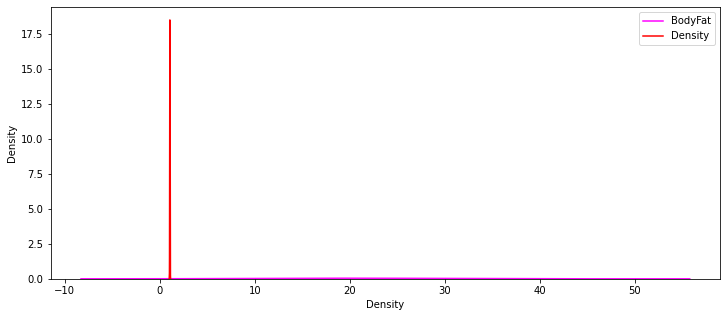

----------------------------------------------------------------------------------------------------
Grafico de distribuição por BodyFat abaixo


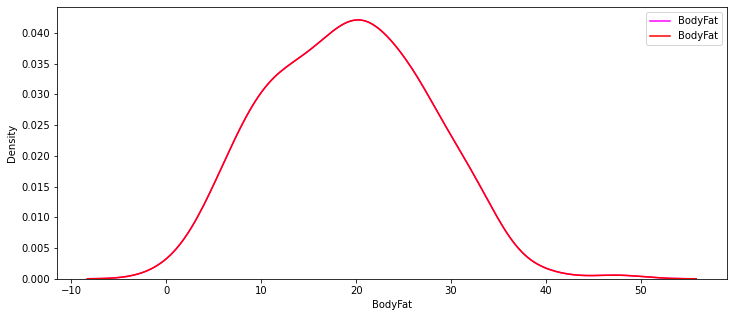

----------------------------------------------------------------------------------------------------
Grafico de distribuição por Age abaixo


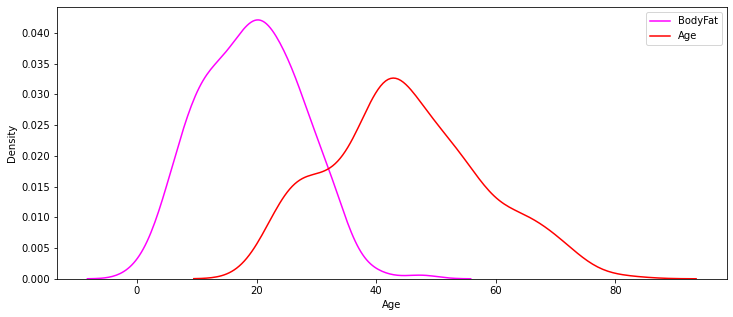

----------------------------------------------------------------------------------------------------
Grafico de distribuição por Weight abaixo


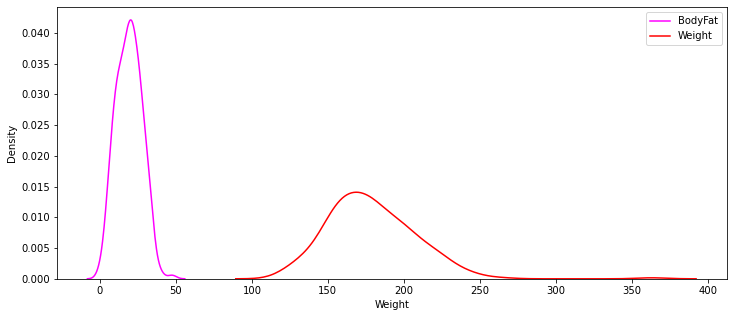

----------------------------------------------------------------------------------------------------
Grafico de distribuição por Height abaixo


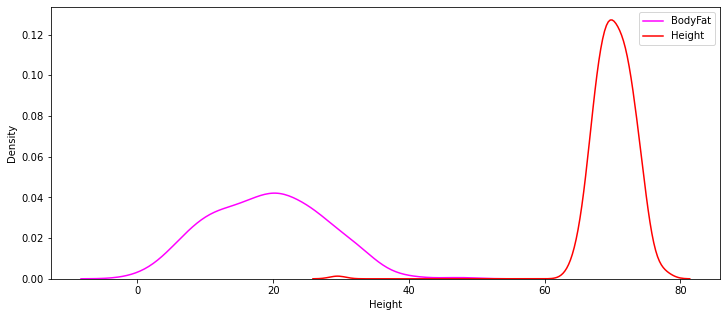

----------------------------------------------------------------------------------------------------
Grafico de distribuição por Neck abaixo


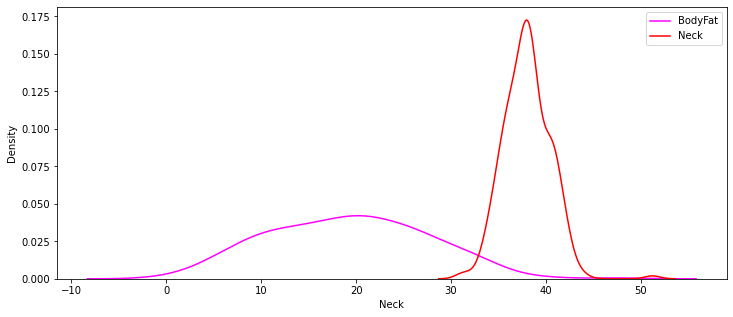

----------------------------------------------------------------------------------------------------
Grafico de distribuição por Chest abaixo


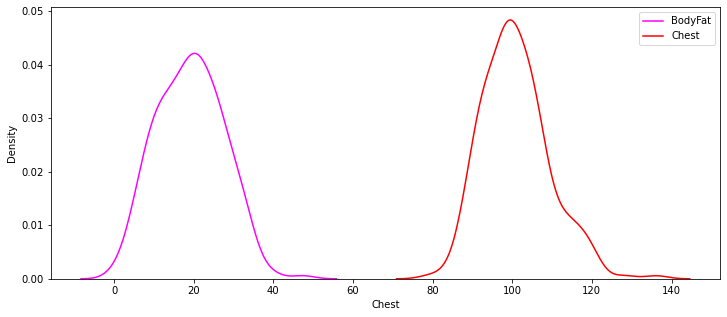

----------------------------------------------------------------------------------------------------
Grafico de distribuição por Abdomen abaixo


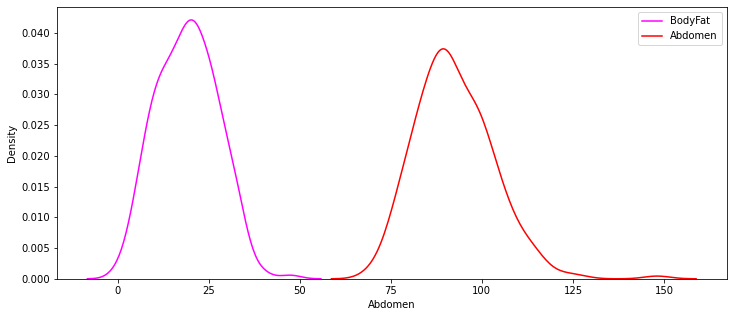

----------------------------------------------------------------------------------------------------
Grafico de distribuição por Hip abaixo


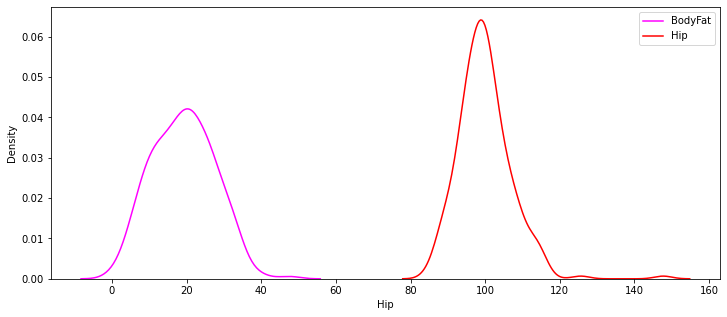

----------------------------------------------------------------------------------------------------
Grafico de distribuição por Thigh abaixo


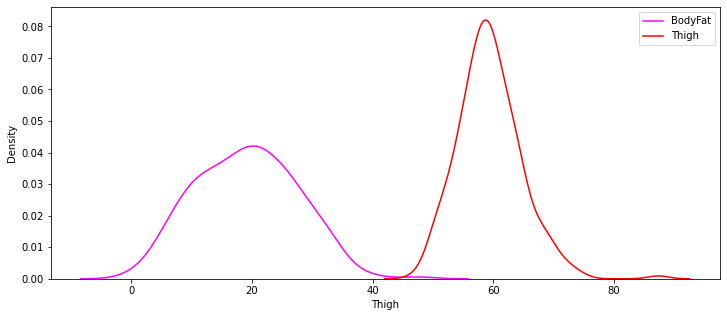

----------------------------------------------------------------------------------------------------
Grafico de distribuição por Knee abaixo


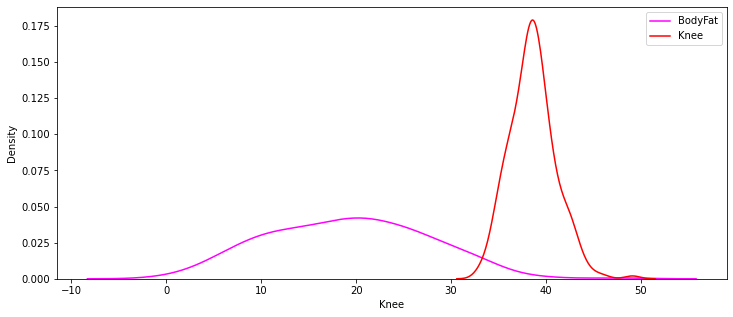

----------------------------------------------------------------------------------------------------
Grafico de distribuição por Ankle abaixo


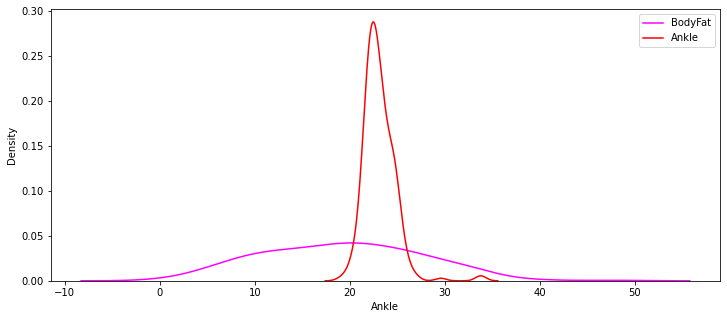

----------------------------------------------------------------------------------------------------
Grafico de distribuição por Biceps abaixo


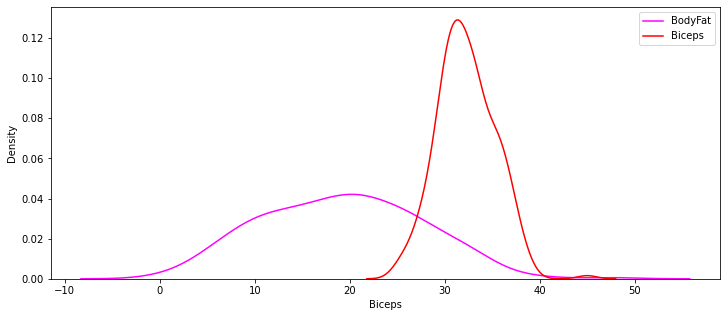

----------------------------------------------------------------------------------------------------
Grafico de distribuição por Forearm abaixo


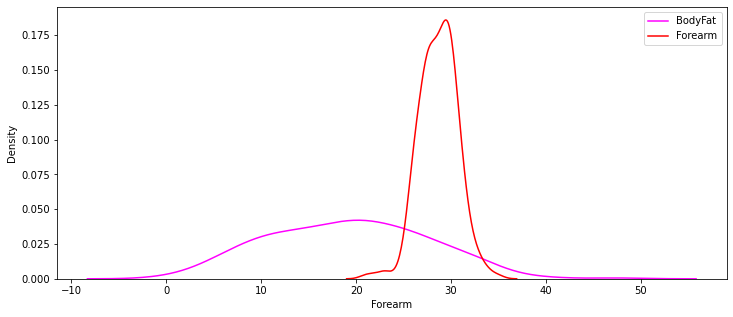

----------------------------------------------------------------------------------------------------
Grafico de distribuição por Wrist abaixo


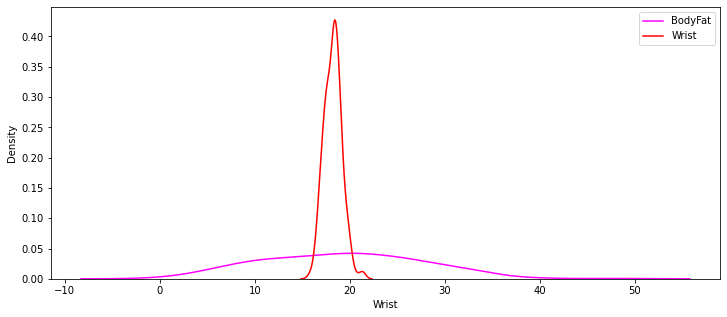

----------------------------------------------------------------------------------------------------


In [7]:
#Aplicando a função
cols = list(df.columns)

for i in cols:
    print(f'Grafico de distribuição por {i} abaixo')
    plotdistplosts(i)
    print('-'*100)

- Como podemos notar, existe muitos graficos qe não tem relação nenhuma com o Body fat, ou seja, são features desnecessarias que vamos excluir na limpeza dos dados.

In [8]:
#Criando um grafico de BoxPlot para verificar se existe Outliers aparenetes

#Grafico de caixa
def plotar_boxplot(coluna):
    
    plt.figure(figsize=(12,6))
    sns.boxplot(df[coluna],color='magenta')
    plt.show()

Graficado para a coluna Density


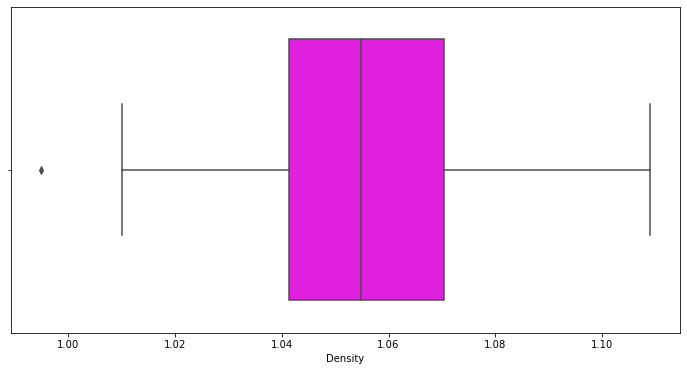

----------------------------------------------------------------------------------------------------
Graficado para a coluna BodyFat


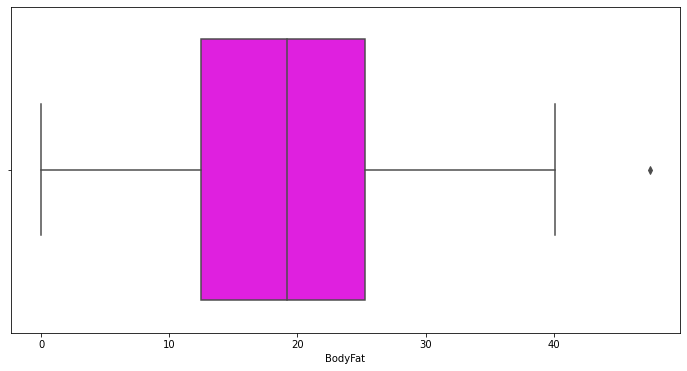

----------------------------------------------------------------------------------------------------
Graficado para a coluna Age


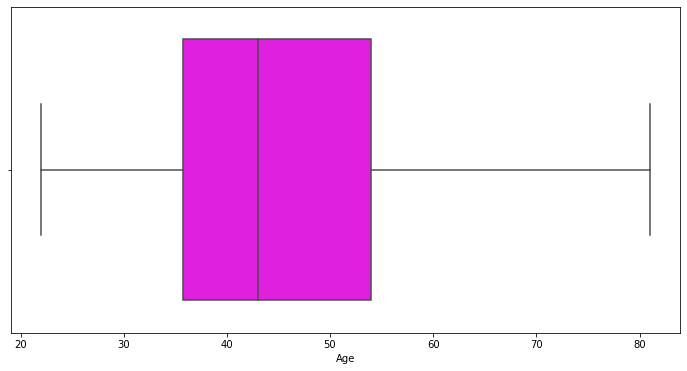

----------------------------------------------------------------------------------------------------
Graficado para a coluna Weight


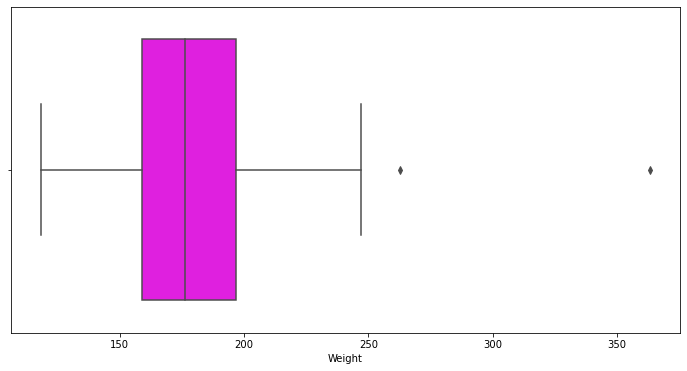

----------------------------------------------------------------------------------------------------
Graficado para a coluna Height


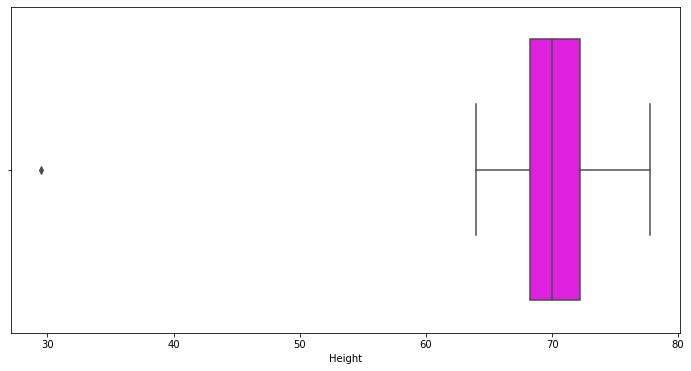

----------------------------------------------------------------------------------------------------
Graficado para a coluna Neck


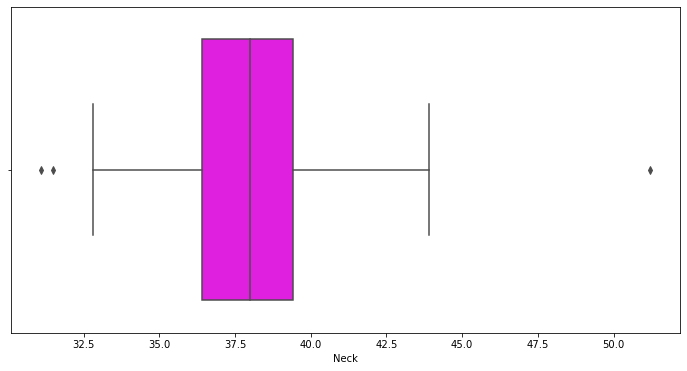

----------------------------------------------------------------------------------------------------
Graficado para a coluna Chest


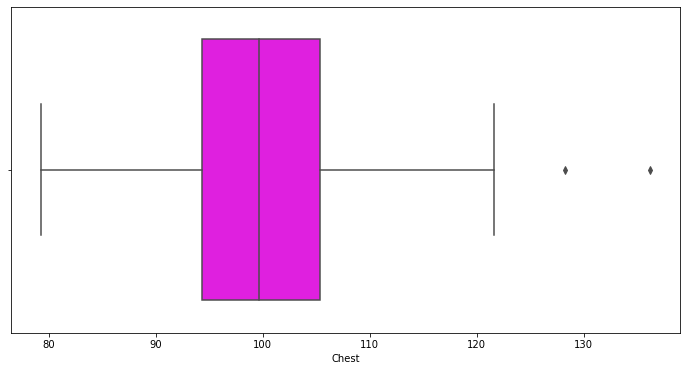

----------------------------------------------------------------------------------------------------
Graficado para a coluna Abdomen


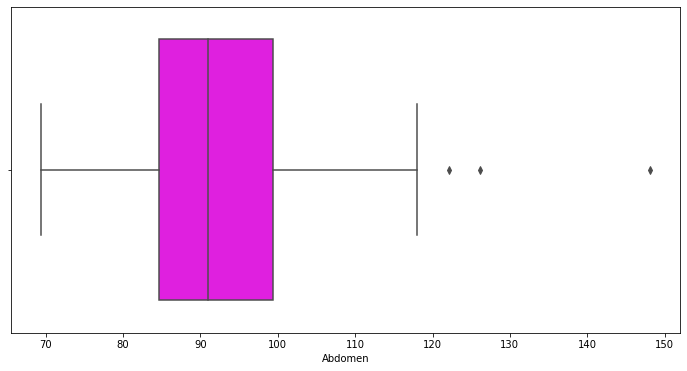

----------------------------------------------------------------------------------------------------
Graficado para a coluna Hip


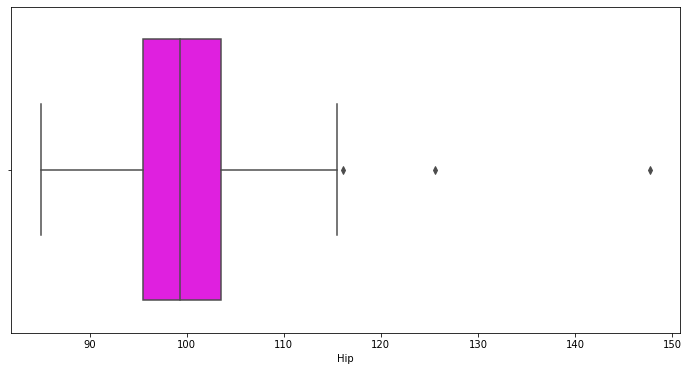

----------------------------------------------------------------------------------------------------
Graficado para a coluna Thigh


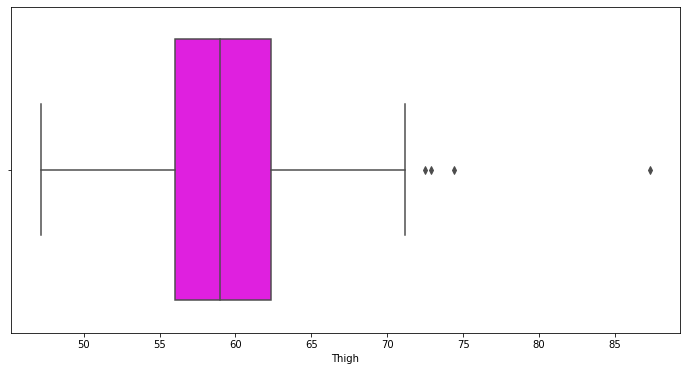

----------------------------------------------------------------------------------------------------
Graficado para a coluna Knee


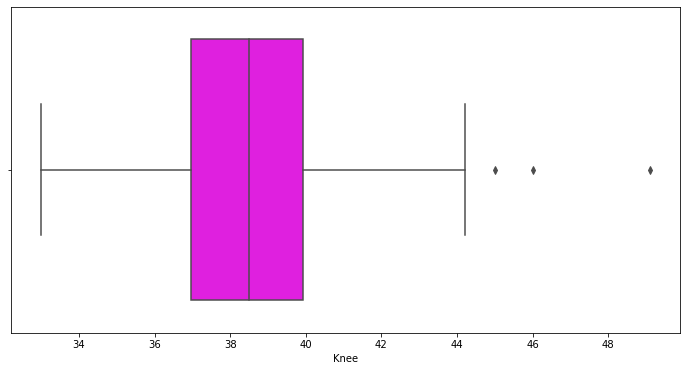

----------------------------------------------------------------------------------------------------
Graficado para a coluna Ankle


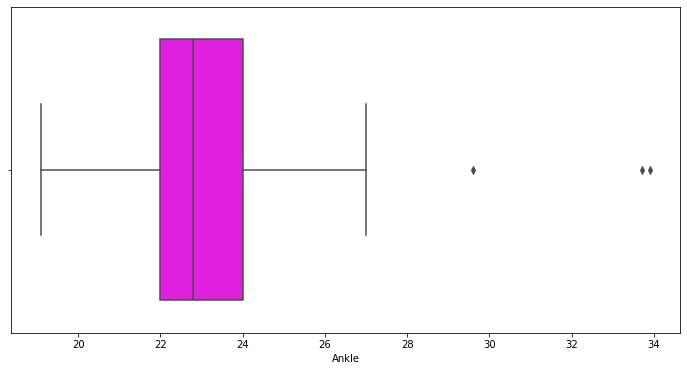

----------------------------------------------------------------------------------------------------
Graficado para a coluna Biceps


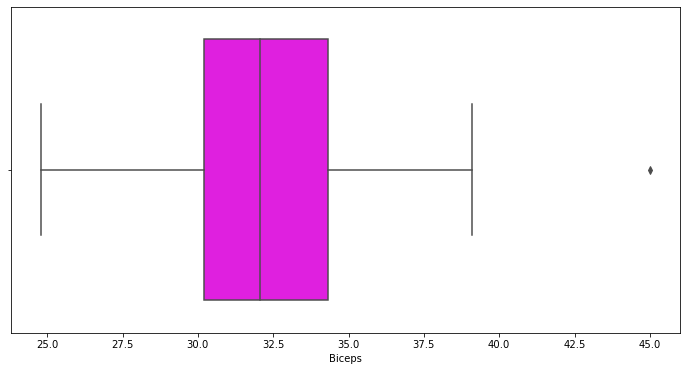

----------------------------------------------------------------------------------------------------
Graficado para a coluna Forearm


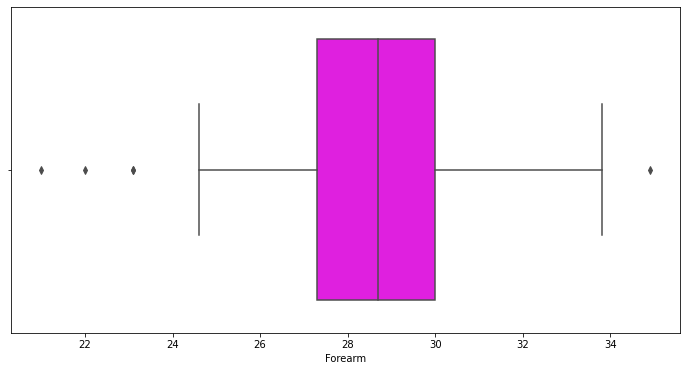

----------------------------------------------------------------------------------------------------
Graficado para a coluna Wrist


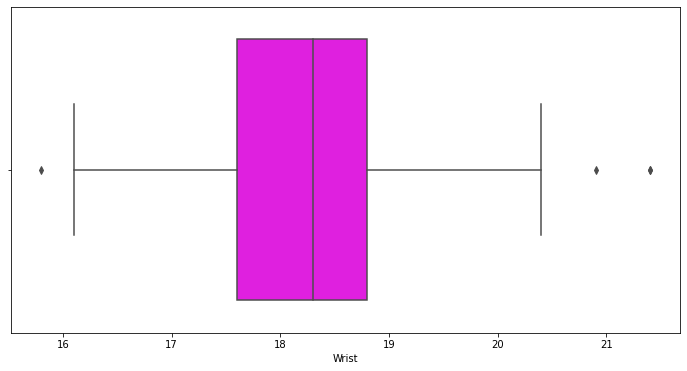

----------------------------------------------------------------------------------------------------


In [9]:
#Aplicando

#Todas as minhas colunas
colunas = list(df.columns)

#Percorendo e plotando o grafico.
for coluna in colunas:
    print(f'Graficado para a coluna {coluna}')
    plotar_boxplot(coluna)
    print('-'*100)

- Como podemos notar, existe alguns pontos fora da curva da média dos nossos dados, porém para confirmar isso, vamos criar uma forma de verificar se existe mesmo valores extramamentes grandes.

---

#### E assim terminamos nossa fase de exploração dos dados, e conseguimos tirar as seguitentes conclusões:
- Não existe valores nulos nos nossos dados.
- O tipo de dados está correto para todas as colunas.
- Existem muitas colunas que não tem relação nenhuma com meus alvo(feature de Body fat), então vamos precisar exclui-las.
- Pode existir outliers, para confirmar isso vamos precisar verificar.

---

#### Etapa 4: Limpar nossos dados
- A conta vai para verificar os outliers vai ser a média dos meus valores mais(+) o desvio padrão * 4, qualquer valor acima disso sera considerado outliers e quando for menor(-) que o desvio padrão * 4 também será considerado outlier.

In [10]:
#Verificando se existe outliers

#Lista de valores maximos e minimos.
limit_maximo = []
limit_minino = []

#Adicionando os valores nas listas de maximo
for coluna in df.columns:
    limit_maximo.append((df[coluna]).mean()+(df[coluna].std())*4)
    limit_minino.append((df[coluna]).mean()-(df[coluna].std())*4)

#Verificando
print(limit_maximo)
print('-'*100)
print(limit_minino)

[1.131699546209892, 52.62575530291247, 95.2930795257921, 296.48104430338105, 84.80023267453079, 47.715716428141484, 134.5461084768865, 135.68825958647918, 128.560992572131, 80.40576049455655, 48.237694538551246, 29.881954545095518, 44.35850770341616, 36.746653548996605, 21.96410162059672]
----------------------------------------------------------------------------------------------------
[0.9794480728377258, -14.324168001325173, -5.5232382559508295, 61.36776522042848, 55.497386373088254, 28.268410555985433, 67.1023042215263, 49.42364517542553, 71.24853123739271, 38.40614426734819, 28.943257842401188, 16.32280735966642, 20.188317693409253, 20.581124228781174, 14.495422188927092]


In [11]:
#Verificando os valores de minimo e maximo no DataFrame
cols=list(df.columns)
cont= 0
#pecorrendo os valores E fazendo a varificando se supera os meus valores maximos.
for coluna in range(len(cols)):
    temp = df.loc[(df[cols[coluna]] > limit_maximo[cont])&df[cols[coluna]]< limit_minino[cont]]
    cont+1
#Verificando
temp

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


- Como podemos notar, segundo a nossa metrica de avaliação não existes valores outliers.

---

- Escolhendo as colunas que vou manter no meu DataFrame
    - Para Realizar isso eu vou utilizar 3 Metricas de escolha de coluna.
        - A primeira vai ser através de um modelo de extra trees, para ver qual colunas ele mais usa.
        - Segundo o modelo de mutual_info_regression, mesma pegada do primeiro, vamos ver quais colunas ele vai usar.
        - Terceiro vamos ver as variavel que mais influencia no meus resultados, para fazer isso vamos usar statsmodels.stats.outliers_influence

In [12]:
#Criando uma copia do meu Df para não danificar a estrutura principal
copia_df = df.copy()

#Separando entre X e Y
x = copia_df.drop('BodyFat',axis=1)
y = copia_df['BodyFat']

- Metodo de Extra Trees

In [13]:
#Importando o modelo de Extra_Trees
from sklearn.ensemble import ExtraTreesRegressor

#Instancia do modelo
modelo_ex = ExtraTreesRegressor()

#Verificando
modelo_ex.fit(x,y)

ExtraTreesRegressor()

<AxesSubplot:>

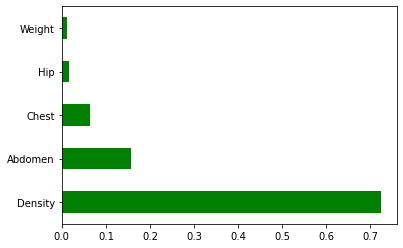

In [14]:
#Plotando em forma grafica as top 5 colunas mais usadas

#Criando um df
plot_data = pd.Series(modelo_ex.feature_importances_,index=x.columns)

#Vendo em forma grafica
plot_data.nlargest(5).plot(kind='barh',color='green')

- O grafico acima demostra as top 5 colunas mais usadas segundo o Extra trees

---

- mutual_info_regression

In [15]:
#Importando o modelo
from sklearn.feature_selection import mutual_info_regression

#Instanciando e treinando
modelo_mr = mutual_info_regression(x,y)

<AxesSubplot:>

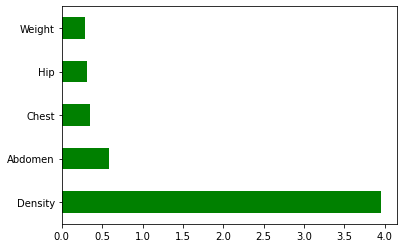

In [16]:
#Verificando em forma grafica
mutual = pd.Series(modelo_mr,index=x.columns)
mutual.nlargest(5).plot(kind='barh',color='green')

- O grafico acima demostra as top 5 colunas mais usadas segundo o mutual_info_regression

---

- variance_inflation_factor

In [17]:
#Importando as bibliotecas necessarias.
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
#Colunas do meu Df
temp = copia_df[list(copia_df.columns)]

#Criando um df
info = pd.DataFrame()

#Adicionando os valores das variantes no df
info['VIF'] = [variance_inflation_factor(temp.values,i) for i in range(temp.shape[1])]

#Adicionando as colunas no df
info['column'] = temp.columns

#Exibindo
info.iloc[:6]

,VIF,column
0,3695.622377,Density
1,33.845429,BodyFat
2,31.376101,Age
3,1238.097164,Weight
4,613.410514,Height
5,1081.965633,Neck


- Aqui podemos ver as top 5 colunas segundo o modelo de variance

---

- Conclusão:
    - Como podemos notar, a coluna de "Density" aparece em todos os top 5, então e com certeza uma coluna que vou manter, e as outras colunas dão uma variada, principalmente na ultima análise.
       - Por causa disso, eu vou optar ir de Extra Trees Regressor de primeira escolha e caso eu não tenha um bom resultado, eu tento com as coluanas de mutual e variance_inflation_factor

In [19]:
#Colunas de Extra Tree
cols_1 = list(plot_data.nlargest(5).index)

#Coluna de Mutual
cols_2 = list(mutual.nlargest(5).index)


#Exibindo
print(cols_1)
print(cols_2)

['Density', 'Abdomen', 'Chest', 'Hip', 'Weight']
['Density', 'Abdomen', 'Chest', 'Hip', 'Weight']


In [20]:
#Filtrando meu de treino(x)
treino = x[cols_1]

#Exibindo
treino

,Density,Abdomen,Chest,Hip,Weight
0,1.0708,85.2,93.1,94.5,154.25
1,1.0853,83.0,93.6,98.7,173.25
2,1.0414,87.9,95.8,99.2,154.00
3,1.0751,86.4,101.8,101.2,184.75
4,1.0340,100.0,97.3,101.9,184.25
...,...,...,...,...,...
247,1.0736,83.6,89.2,88.8,134.25
248,1.0236,105.0,108.5,104.5,201.00
249,1.0328,111.5,111.1,101.7,186.75
250,1.0399,101.3,108.3,97.8,190.75


<AxesSubplot:>

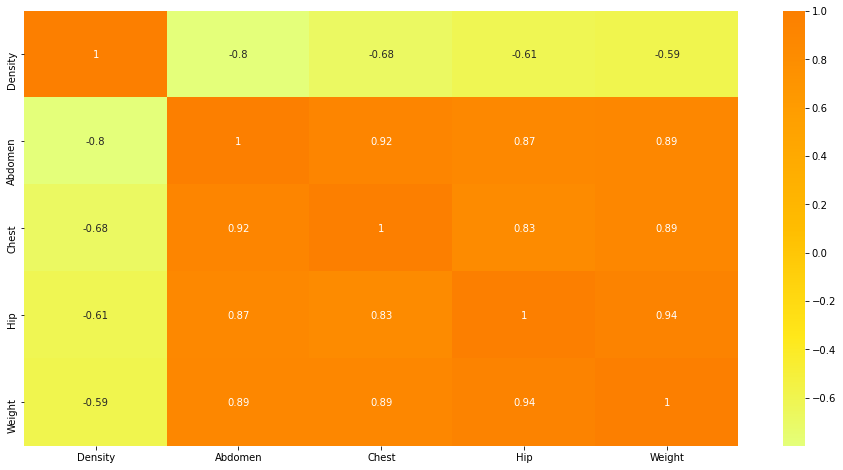

In [21]:
#Plotando um grafico de heatmap para ver as correlação das nossas features de treino
plt.figure(figsize=(16,8))
sns.heatmap(treino.corr(),cmap='Wistia',annot=True)

- Como podemos notar, praticamente todas as colunas tem uma relação forte, menos nossa melhor coluna Density que parece não ter correlação com ninguém.
- Para mim parece bom, então vamos seguir em frente com a aplicação do modelo.

### Dicionario das colunas utilizadas:
- Density: Densidade
- Abdomen: Circunferência do Abdomen
- Chest: Circunferência do Peito
- Hip: Circunferência do Quadril
- Weight: Peso

---

- E assim terminamos o processo de limpeza dos dados
    - Nesse processos eu:
        - Revisei a existencia de outliers.
        - Removi colunas irrelevante, com a ajuda de 3 teste de avaliação das melhores colunas.
        - Plotei um grafico de heatmapa para analisar a correlação.

---    

#### Etapa 5: Aplicação do modelo

In [22]:
#Separando as informação entre X Y
x = treino


#Y já está definido
y

#Separando entre treino e teste
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=10,test_size=0.3)

In [23]:
#Definindo a função que vai avaliar meu modelo

def Avaliarmodelo(nome_modelo,y_test,previsao):
    r2 = r2_score(y_test, previsao)
    RMSE = np.sqrt(mean_squared_error(y_test,previsao))
    return print(f'O Modelo: {nome_modelo}\nTeve o R² de: {r2:.2%}\nRMSE de: {RMSE:.2f}')

In [24]:
#Instancia dos modelos
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()
modelo_dc = DecisionTreeRegressor()
modelo_sv = SVR()

#Dicionario para facilitar o acesso dos modelos
Modelos = {
    'RandomForest': modelo_rf,
    'LinearRegression':modelo_lr,
    'ExtraTress':modelo_et,
    'Decision Tree Regressor':modelo_dc,
    'SVR':modelo_sv,
    
}

In [25]:
#Pecorrendo cada modelo, fazendo o treinamento, a previsão e a avaliação dele.
for nome_modelo, Modelo in Modelos.items():
    
    #Treinando o modelo
    Modelo.fit(x_train, y_train)
    
    #Prevendo
    previsao = Modelo.predict(x_test)
    
    #Avaliando
    Avaliarmodelo(nome_modelo,y_test, previsao)
    
    #Separando
    print('-'*100)

O Modelo: RandomForest
Teve o R² de: 96.93%
RMSE de: 1.49
----------------------------------------------------------------------------------------------------
O Modelo: LinearRegression
Teve o R² de: 98.17%
RMSE de: 1.15
----------------------------------------------------------------------------------------------------
O Modelo: ExtraTress
Teve o R² de: 97.41%
RMSE de: 1.37
----------------------------------------------------------------------------------------------------
O Modelo: Decision Tree Regressor
Teve o R² de: 96.78%
RMSE de: 1.53
----------------------------------------------------------------------------------------------------
O Modelo: SVR
Teve o R² de: 42.41%
RMSE de: 6.46
----------------------------------------------------------------------------------------------------


- Como podemos notar, o melhor modelo e o modelo de Linear Regression, com 98% de R² e apenas errando por 1.15, então vamos testar ele comparando com o valor real.

---

#### Etapa 6: Testando o modelo

In [26]:
#Transformando os valores em um array
valor_treino = np.array(x)
#Previsões de cada valor
predicted = []

#Fazendo a previsão para cada valor do array
for i in range(len(valor_treino)):
    predicted.append(modelo_lr.predict([valor_treino[i]]))

In [27]:
#Valores reais são meu Y que são meus valores originais
copia_df['Resultado Real'] = y

#Valores previsto em um array
copia_df['Resultado Previsto'] = np.array(predicted)

In [28]:
#Exibindo o resultado
copia_df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Resultado Real,Resultado Previsto
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3,12.491500
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1,6.411839
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3,24.673066
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4,10.971014
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7,28.144756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,11.0,11.236727
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,33.6,32.947785
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,29.3,29.650134
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.0,26.205336


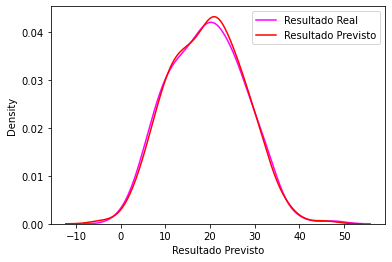

In [29]:
#Verificando em forma grafica

#Linha do valor real
sns.distplot(copia_df['Resultado Real'],label ='Resultado Real',hist=False,color='magenta')

#Linha do valor Presvito
sns.distplot(copia_df['Resultado Previsto'],label='Resultado Previsto',hist=False,color='Red')

#Plot.
plt.legend()
plt.show()

---

- Como podemos notar, nosso valor previsto e muito proximo do valor real, então isso quer dizer que temos um bom modelo aqui, e podemos seguir em frente com o processo de deploy.

---

#### Etapa 7: Deploy do modelo

In [30]:
#Salvando o projeto
import pickle
file = open('bodyfatmodel.pkl','wb')
pickle.dump(modelo_lr,file)
file.close()

- Link do Webapp:
https://morning-springs-91159.herokuapp.com/

#### Etapa 8: Conclusão do Projeto.

#Conclusão.
- Sinto que consegui fazer aquilo que me propus a fazer no inicio desse projeto, pois consegui criar um webapp que mesmo com informações simples dadas ao modelo, fazer com que ele consiga ter um bom desempenho na previsão, isso e bom pois como o objetivo principal era criar algo que ajuda-se as pessoas a ter uma ideia de como anda a saúde delas está, foi isso que eu criei, estão estou sadisfeito com o projeto, e foi mais um aprendizado prático que desenvolvi.